In [12]:
import sys
from pathlib import Path
curr_path = str(Path().absolute())
parent_path = str(Path().absolute().parent)
sys.path.append(parent_path) # add current terminal path to sys.path

from Mnist.load_data import load_local_mnist

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

(X_train, y_train), (X_test, y_test) = load_local_mnist(normalize = False,one_hot = False)


原本特征维度数：784
降维后的特征维度数：154


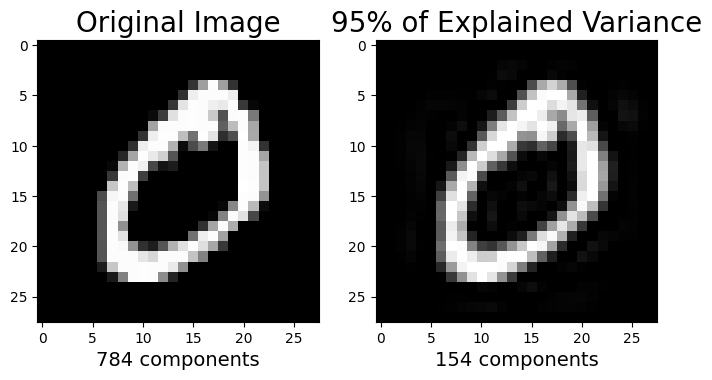

In [13]:

print(f"原本特征维度数：{X_train.shape[1]}") # 特征维度数为784
# n_components是>=1的整数时，表示期望PCA降维后的特征维度数
# n_components是[0,1]的数时，表示主成分的方差和所占的最小比例阈值，PCA类自己去根据样本特征方差来决定降维到的维度
pca = PCA(n_components=0.95) 
lower_dimensional_data = pca.fit_transform(X_train)
print(f"降维后的特征维度数：{pca.n_components_}")

approximation = pca.inverse_transform(lower_dimensional_data)

plt.figure(figsize=(8,4));

# 原始图片
plt.subplot(1, 2, 1);
plt.imshow(X_train[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel(f'{X_train.shape[1]} components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 降维后的图片
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel(f'{pca.n_components_} components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);
plt.show()

# Showing Graph of Explained Variance vs Number of Principal Components

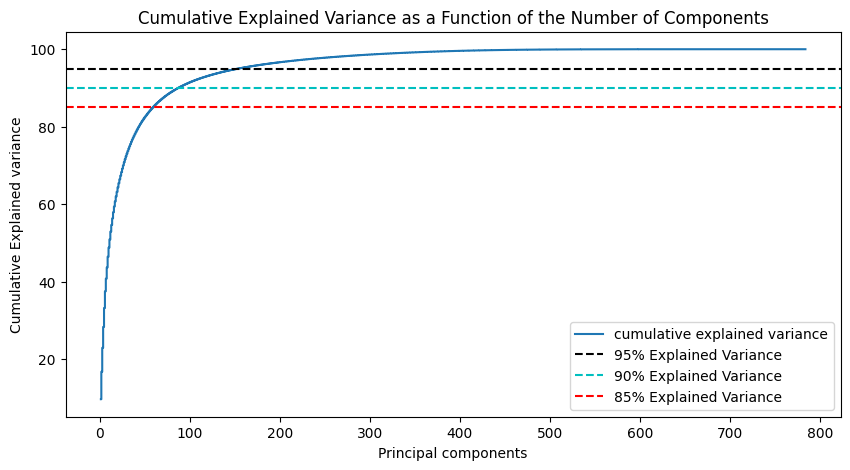

In [18]:
pca = PCA()
pca.fit(X_train)
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 

cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()